In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# generate numpy array from correlation matrix text file produced by run_30_pp_roi.tcsh
matrix_post = np.genfromtxt('sub-Linus_postdrug_3mm_smoothing.netcc', skip_header=6)
matrix_pre = np.genfromtxt('sub-Linus_predrug_3mm_smoothing.netcc', skip_header=6)

In [3]:
for i in range(len(matrix_post)):
    matrix_post[i,i] = np.nan
    matrix_pre[i,i] = np.nan

In [4]:
#slice matrix into parts that make sense for our analysis
# CL_CL: correlation within left hemisphere
# CR_CR: correlation within right hemisphere
# CL_CR: correlation across left and right hemisphere
# CL_CL: correlation across right and left hemisphere

slicer = int(len(matrix_post)/2)

CL_CL_matrix_pre = matrix_pre[:slicer,:slicer]
#print(CL_CL_matrix)
CR_CR_matrix_pre = matrix_pre[slicer:,slicer:]
#print(CR_CR_matrix)
CL_CR_matrix_pre = matrix_pre[:slicer,slicer:]
#CL_CR_matrix
CR_CL_matrix_pre = matrix_pre[slicer:,:slicer]
#CR_CL_matrix

CL_CL_matrix_post = matrix_post[:slicer,:slicer]

CR_CR_matrix_post = matrix_post[slicer:,slicer:]

CL_CR_matrix_post = matrix_post[:slicer,slicer:]

CR_CL_matrix_post = matrix_post[slicer:,:slicer]

In [6]:
#flatten the matrices because otherwise you get separate t-tests for every column with the ttest_rel function
CL_CL_matrix_pre_1d = CL_CL_matrix_pre.flatten()
CR_CR_matrix_pre_1d = CR_CR_matrix_pre.flatten()
CL_CR_matrix_pre_1d = CL_CR_matrix_pre.flatten()
CL_CL_matrix_post_1d = CL_CL_matrix_post.flatten()
CR_CR_matrix_post_1d = CR_CR_matrix_post.flatten()
CL_CR_matrix_post_1d = CL_CR_matrix_post.flatten()

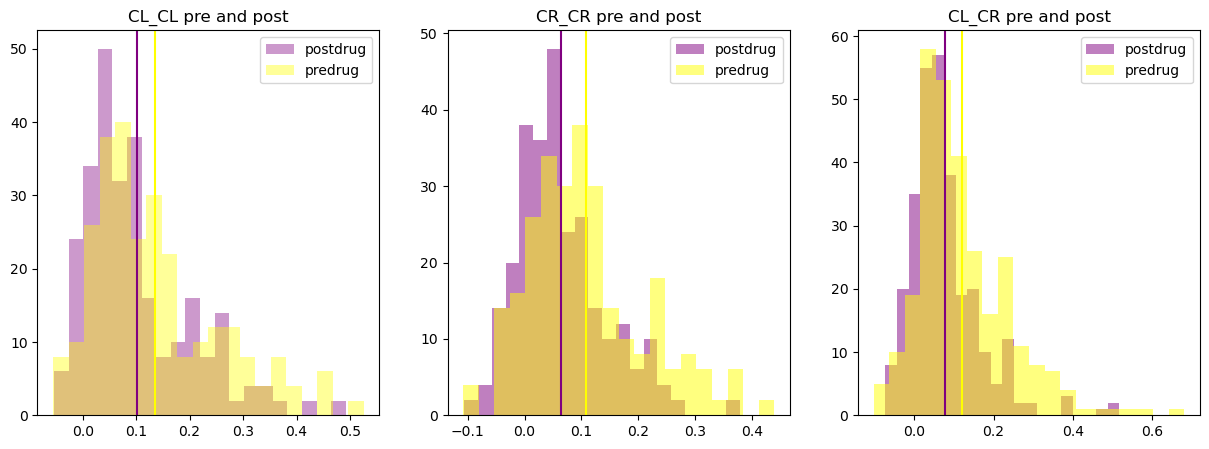

In [31]:
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

#colors = ['red', 'tan', 'lime']
#ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#ax0.legend(prop={'size': 10})
#ax0.set_title('bars with legend')
ax0.hist(CL_CL_matrix_post_1d, 20, histtype='bar', color='purple', alpha=0.5)
ax0.hist(CL_CL_matrix_pre_1d, 20, histtype='bar', color='yellow', alpha=0.5)
ax0.set_title('CL_CL pre and post')
ax0.legend(['postdrug', 'predrug'])
ax0.axvline(np.nanmean(CL_CL_matrix_post_1d), color = 'purple')
ax0.axvline(np.nanmean(CL_CL_matrix_pre_1d), color = 'yellow')

ax1.hist(CR_CR_matrix_post_1d, 20, histtype='bar', color='purple', alpha=0.5)
ax1.hist(CR_CR_matrix_pre_1d, 20, histtype='bar', color='yellow', alpha=0.5)
ax1.set_title('CR_CR pre and post')
ax1.legend(['postdrug', 'predrug'])
ax1.axvline(np.nanmean(CR_CR_matrix_post_1d), color = 'purple')
ax1.axvline(np.nanmean(CR_CR_matrix_pre_1d), color = 'yellow')

ax2.hist(CL_CR_matrix_post_1d, 20, histtype='bar', color='purple', alpha=0.5)
ax2.hist(CL_CR_matrix_pre_1d, 20, histtype='bar', color='yellow', alpha=0.5)
ax2.set_title('CL_CR pre and post')
ax2.legend(['postdrug', 'predrug'])
ax2.axvline(np.nanmean(CL_CR_matrix_post_1d), color = 'purple')
ax2.axvline(np.nanmean(CL_CR_matrix_pre_1d), color = 'yellow')